In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as xticks
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [2]:
chdata=pd.read_csv('D:\FilpRobo\DSData\Telecom_customer_churn.csv')

In [3]:
chdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
chdata.shape

(7043, 21)

In [5]:
chdata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
chdata=chdata.drop('customerID',axis=1)

In [7]:
chdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
def get_unique(df,columns):
    return{column:list(df[column].unique()) for column in columns}

In [9]:
def get_category(df):
    return[column for column in  df.columns if df.dtypes[column]=='object']

In [10]:
get_unique(chdata,get_category(chdata))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [11]:
sorted(chdata['TotalCharges'].unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [12]:
chdata['TotalCharges']=chdata['TotalCharges'].replace(' ',np.NaN)
chdata['TotalCharges']=chdata['TotalCharges'].astype(np.float)
chdata['TotalCharges']=chdata['TotalCharges'].fillna(chdata['TotalCharges'].mean())

C:\Users\smile\AppData\Local\Temp/ipykernel_21052/999293381.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chdata['TotalCharges']=chdata['TotalCharges'].astype(np.float)


In [13]:
chdata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
get_unique(chdata,get_category(chdata))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [15]:
chdata['MultipleLines']=chdata['MultipleLines'].replace('No phone service','No')
chdata[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=chdata[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

In [16]:
get_unique(chdata,get_category(chdata))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [17]:
binarycol=['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
ordinalcol=['InternetService','Contract']
nomialcol=['PaymentMethod']
target_column='Churn'

In [18]:
internet_ordering= ['No','DSL', 'Fiber optic']
contract_ordering=['Month-to-month', 'One year', 'Two year']

In [19]:
def binary_encode(df,column,positive_value):
    df=df.copy()
    df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df

def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [20]:
def ordinal_encode(df,column,ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x: ordering.index(x))
    return df

In [21]:
chdata=ordinal_encode(chdata,'Contract',contract_ordering)

In [22]:
chdata=ordinal_encode(chdata,'InternetService',internet_ordering)

In [23]:
chdata=binary_encode(chdata,'Churn','Yes')

In [24]:
chdata=binary_encode(chdata,'gender','Male')
bifeature=['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for feature in bifeature:
    chdata=binary_encode(chdata,feature,'Yes')


chdata=onehot_encode(chdata,'PaymentMethod')

In [25]:
chdata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,...,1,1,1,84.80,1990.50,0,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,...,1,1,1,103.20,7362.90,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,0,1,29.60,346.45,0,0,0,1,0
7041,0,1,1,0,4,1,1,2,0,0,...,0,0,1,74.40,306.60,1,0,0,0,1


In [39]:
y=chdata['Churn']
X=chdata.drop('Churn',axis=1)

In [40]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [42]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [44]:
X

array([[ 0.        , -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.        , -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.        , -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [ 0.        , -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.        ,  2.27315869,  1.03453023, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.        , -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)

In [51]:
y_train

2156    1
5203    0
3       0
6204    0
208     1
       ..
5285    0
1166    0
2974    1
881     0
5731    0
Name: Churn, Length: 2112, dtype: int64

In [29]:
X.shape

(7043, 22)

In [30]:
y.shape

(7043,)

In [31]:
y.sum()/len(y)

0.2653698707936959

In [52]:
inputs=tf.keras.Input(shape=(22,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC(name='auc')])

batch_size=64
epochs=100

history=model.fit(X_train,y_train,validation_split=0.2,
                  batch_size=batch_size,epochs=epochs,
                  callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
                  verbose=0)

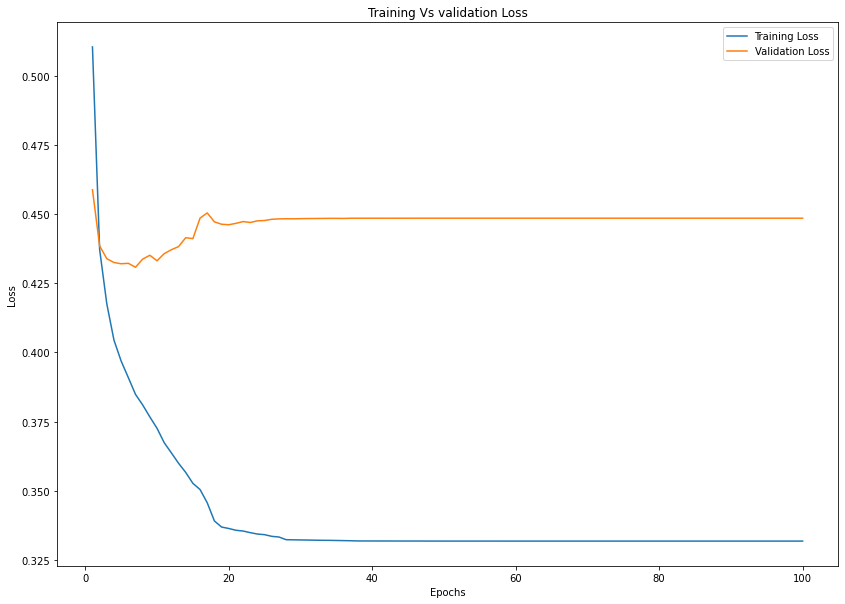

In [53]:
plt.figure(figsize=(14,10))

epochs_range=range(1,epochs+1)
train_loss=history.history['loss']
test_loss=history.history['val_loss']

plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,test_loss,label='Validation Loss')

plt.title('Training Vs validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [54]:
np.argmin(test_loss)

6

In [55]:
model.evaluate(X_test,y_test)

155/155 [==============================] - 0s 2ms/step - loss: 0.4473 - auc: 0.8248


[0.4473097026348114, 0.8247684836387634]